In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

CAD2022 = pd.read_excel('call_data_from_CAD_2022.xlsx')
CAHOOTS23 = pd.read_excel('call_data_from_CAHOOTS.xlsx')
CAHOOTS21to22 = pd.read_excel('call_data_from_CAHOOTS_2021_2022.xlsx')

**CAHOOTS DATA**

consider more columns to drop

In [5]:
CAHOOTS23.dropna(subset=['Date'], inplace=True) # drop rows with NA TimeOfCall
CAHOOTS23.dropna(subset=['TimeOfCall'], inplace=True)

CAHOOTS23['Date'] = CAHOOTS23['Date'].astype(str).str.extract(r'(\d{4}-\d{2}-\d{2})') #make sure only date is in date
CAHOOTS23['TimeOfCall'] = CAHOOTS23['TimeOfCall'].astype(str).str.extract(r'(\d{2}:\d{2}:\d{2})') # make sure only time is in time

CAHOOTS23['DateTime'] = pd.to_datetime(CAHOOTS23['Date'].astype(str) + ' ' + CAHOOTS23['TimeOfCall'], errors='coerce') #make DateTime
CAHOOTS23.set_index('DateTime', inplace= True) # set date time as index 

#CAHOOTS23

In [6]:
CAHOOTS21to22.dropna(subset=['Date'], inplace=True)
CAHOOTS21to22.dropna(subset=['TimeOfCall'], inplace=True)

CAHOOTS21to22['Date'] = CAHOOTS21to22['Date'].astype(str).str.extract(r'(\d{4}-\d{2}-\d{2})')
CAHOOTS21to22['TimeOfCall'] = CAHOOTS21to22['TimeOfCall'].astype(str).str.extract(r'(\d{2}:\d{2}:\d{2})')

CAHOOTS21to22['DateTime'] = pd.to_datetime(CAHOOTS21to22['Date'].astype(str) + ' ' + CAHOOTS21to22['TimeOfCall'], errors='coerce')
CAHOOTS21to22.set_index('DateTime', inplace=True)

#CAHOOTS21to22

In [7]:
cahoots = pd.concat([CAHOOTS21to22, CAHOOTS23], ignore_index=False)
CAHOOTS21to22.dropna(subset=['Date'], inplace=True)
CAHOOTS21to22.dropna(subset=['TimeOfCall'], inplace=True)
cahoots.drop(columns=['Date', 'TimeOfCall','Age','Gender','Race','Language','City'], inplace=True)
cahoots.sort_index(inplace= True)
cahoots

,Reason for Dispatch
DateTime,
2021-01-04 20:10:31,Public Assist
2021-01-14 14:28:00,Public Assist
2021-01-14 14:53:00,Check Welfare
2021-01-14 14:53:00,Check Welfare
2021-01-14 14:55:00,Check Welfare
...,...
2023-12-31 23:33:57,Information Not Available
2023-12-31 23:38:00,Information Not Available
2023-12-31 23:52:00,Information Not Available


**WEATHER DATA**

consider more columns to drop

In [8]:
headers = ["WBANNO", "UTC_DATE", "UTC_TIME", "LST_DATE", "LST_TIME", "CRX_VN", "LONGITUDE", "LATITUDE",
    "T_CALC", "T_HR_AVG", "T_MAX", "T_MIN", "P_CALC", "SOLARAD", "SOLARAD_FLAG", "SOLARAD_MAX",
    "SOLARAD_MAX_FLAG", "SOLARAD_MIN", "SOLARAD_MIN_FLAG", "SUR_TEMP_TYPE", "SUR_TEMP",
    "SUR_TEMP_FLAG", "SUR_TEMP_MAX", "SUR_TEMP_MAX_FLAG", "SUR_TEMP_MIN", "SUR_TEMP_MIN_FLAG",
    "RH_HR_AVG", "RH_HR_AVG_FLAG", "SOIL_MOISTURE_5", "SOIL_MOISTURE_10", "SOIL_MOISTURE_20",
    "SOIL_MOISTURE_50", "SOIL_MOISTURE_100", "SOIL_TEMP_5", "SOIL_TEMP_10", "SOIL_TEMP_20",
    "SOIL_TEMP_50", "SOIL_TEMP_100"]

file_path21 = 'CRNH0203-2021-OR_Corvallis_10_SSW.txt'
file_path22 = 'CRNH0203-2022-OR_Corvallis_10_SSW.txt'
file_path23 = 'CRNH0203-2023-OR_Corvallis_10_SSW.txt'
widths = [6, 9, 5, 9, 5, 7, 8, 8, 8, 8, 8, 8, 8, 7, 2, 7, 2, 7, 2, 2, 8, 2, 8, 2, 8, 2, 6, 2, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]

weather21 = pd.read_fwf(file_path21, widths=widths, header=None)
weather22 = pd.read_fwf(file_path22, widths=widths, header=None)
weather23 = pd.read_fwf(file_path23, widths=widths, header=None)

weather21.columns = headers  
weather22.columns = headers  
weather23.columns = headers  

weather21['DateTime'] = pd.to_datetime(weather21['LST_DATE'].astype(str) + ' ' + weather21['LST_TIME'].astype(str).str.zfill(4),format='%Y%m%d %H%M')
weather22['DateTime'] = pd.to_datetime(weather22['LST_DATE'].astype(str) + ' ' + weather22['LST_TIME'].astype(str).str.zfill(4),format='%Y%m%d %H%M')
weather23['DateTime'] = pd.to_datetime(weather23['LST_DATE'].astype(str) + ' ' + weather23['LST_TIME'].astype(str).str.zfill(4),format='%Y%m%d %H%M')

for df in [weather21, weather22, weather23]:
    df['DateTime'] = pd.to_datetime(df['LST_DATE'].astype(str) + ' ' + df['LST_TIME'].astype(str).str.zfill(4), format='%Y%m%d %H%M')
    df.set_index('DateTime', inplace=True)
    df.drop(columns=['UTC_DATE', 'UTC_TIME', 'LST_DATE', 'LST_TIME', 'WBANNO', 'CRX_VN', 'LONGITUDE', 'LATITUDE'], inplace=True)

weather = pd.concat([weather21, weather22, weather23], ignore_index=False)
weather.sort_index(inplace= True)
        
cols_to_drop = ['T_CALC','SOLARAD_FLAG','SOLARAD_MAX_FLAG','SOLARAD_MIN_FLAG','SUR_TEMP_TYPE','SUR_TEMP_FLAG','SUR_TEMP_MAX_FLAG','SUR_TEMP_MIN_FLAG','RH_HR_AVG','RH_HR_AVG_FLAG','SOIL_TEMP_100','SOIL_TEMP_50','SOIL_TEMP_20','SOIL_TEMP_10','SOIL_MOISTURE_100','SOIL_MOISTURE_50','SOIL_MOISTURE_20','SOIL_MOISTURE_10']

weather = weather.drop(columns = cols_to_drop)

weather

,T_HR_AVG,T_MAX,T_MIN,P_CALC,SOLARAD,SOLARAD_MAX,SOLARAD_MIN,SUR_TEMP,SUR_TEMP_MAX,SUR_TEMP_MIN,SOIL_MOISTURE_5,SOIL_TEMP_5
DateTime,,,,,,,,,,,,
2020-12-31 17:00:00,9.8,10.2,9.5,0.0,1,5,0,8.5,9.3,7.9,0.380,8.0
2020-12-31 18:00:00,9.3,9.5,9.2,0.0,0,0,0,8.0,8.3,7.8,0.372,7.8
2020-12-31 19:00:00,9.1,9.3,8.9,0.0,0,0,0,7.9,8.2,7.2,0.373,7.7
2020-12-31 20:00:00,8.8,9.1,8.4,0.0,0,0,0,6.9,7.3,6.4,0.375,7.5
2020-12-31 21:00:00,8.8,9.0,8.6,0.0,0,0,0,7.4,7.5,7.2,0.368,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-18 22:00:00,4.8,4.9,4.6,0.5,0,0,0,5.3,5.4,5.1,-99.000,-9999.0
2023-12-18 23:00:00,4.9,5.0,4.8,0.2,0,0,0,5.3,5.3,5.2,-99.000,-9999.0
2023-12-19 00:00:00,5.0,5.3,4.9,1.9,0,0,0,5.3,5.5,5.3,-99.000,-9999.0


In [9]:
weather.replace([-9999.0, -99.000,-99999], np.nan, inplace=True)

missing_rows_count = weather.isna().any(axis=1).sum()

print("Number of rows with missing data:", missing_rows_count)

columns_with_missing_values = weather.columns[weather.isna().any()].tolist()

print("Columns with missing values:", columns_with_missing_values)

Number of rows with missing data: 4835
Columns with missing values: ['T_HR_AVG', 'T_MAX', 'T_MIN', 'P_CALC', 'SOLARAD', 'SOLARAD_MAX', 'SOLARAD_MIN', 'SUR_TEMP', 'SUR_TEMP_MAX', 'SUR_TEMP_MIN', 'SOIL_MOISTURE_5', 'SOIL_TEMP_5']


In [10]:
weather['SOLARAD'].min()

0.0

**DATA**

In [11]:
wc = pd.merge_asof(cahoots, weather, left_index=True, right_index=True, direction='nearest')


In [12]:
wc

,Reason for Dispatch,T_HR_AVG,T_MAX,T_MIN,P_CALC,SOLARAD,SOLARAD_MAX,SOLARAD_MIN,SUR_TEMP,SUR_TEMP_MAX,SUR_TEMP_MIN,SOIL_MOISTURE_5,SOIL_TEMP_5
DateTime,,,,,,,,,,,,,
2021-01-04 20:10:31,Public Assist,5.8,5.9,5.3,0.4,0.0,0.0,0.0,4.7,5.6,3.2,0.399,8.6
2021-01-14 14:28:00,Public Assist,9.4,9.8,8.8,0.0,260.0,480.0,170.0,13.8,16.0,12.1,0.371,9.4
2021-01-14 14:53:00,Check Welfare,10.3,10.7,9.6,0.0,268.0,387.0,175.0,14.3,15.8,13.1,0.368,9.7
2021-01-14 14:53:00,Check Welfare,10.3,10.7,9.6,0.0,268.0,387.0,175.0,14.3,15.8,13.1,0.368,9.7
2021-01-14 14:55:00,Check Welfare,10.3,10.7,9.6,0.0,268.0,387.0,175.0,14.3,15.8,13.1,0.368,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:33:57,Information Not Available,5.1,5.3,5.0,0.0,0.0,0.0,0.0,5.3,5.5,4.9,NaN,NaN
2023-12-31 23:38:00,Information Not Available,5.1,5.3,5.0,0.0,0.0,0.0,0.0,5.3,5.5,4.9,NaN,NaN
2023-12-31 23:52:00,Information Not Available,5.1,5.3,5.0,0.0,0.0,0.0,0.0,5.3,5.5,4.9,NaN,NaN


**CHECK for working merge**

In [13]:
## check if merge is working properly 

cahoots.head(20)

date_range = pd.date_range(start="2021-01-14", periods=24, freq='H')

temperatures = pd.Series(50 + 10 * np.random.rand(24))

weather_df = pd.DataFrame({
    "DateTime": date_range,
    "AirTemp": temperatures
})
c = cahoots.head(20)
#weather_df

weather_df = weather_df.set_index('DateTime')

merged_df = pd.merge_asof(c.sort_index(), weather_df.sort_index(), left_index=True, right_index=True, direction='nearest')

#merged_df


#It appears my merge is working properly!!!!

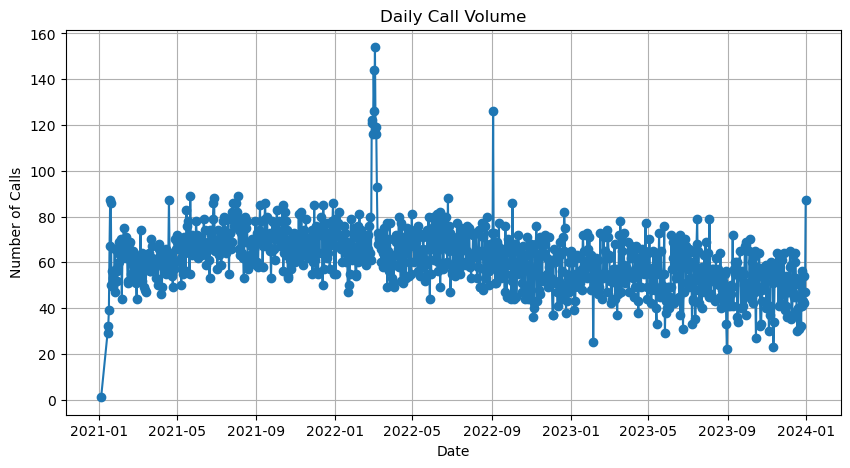

In [14]:
daily_calls = wc.resample('D').size()

daily_calls = daily_calls[daily_calls > 0]

plt.figure(figsize=(10, 5))
plt.plot(daily_calls.index, daily_calls.values, marker='o', linestyle='-')
plt.title('Daily Call Volume')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()


/var/folders/rw/srsc7tq57fv7qr3sm2wgwhc00000gn/T/ipykernel_2003/1609560629.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_weather = wc.resample('D').mean()


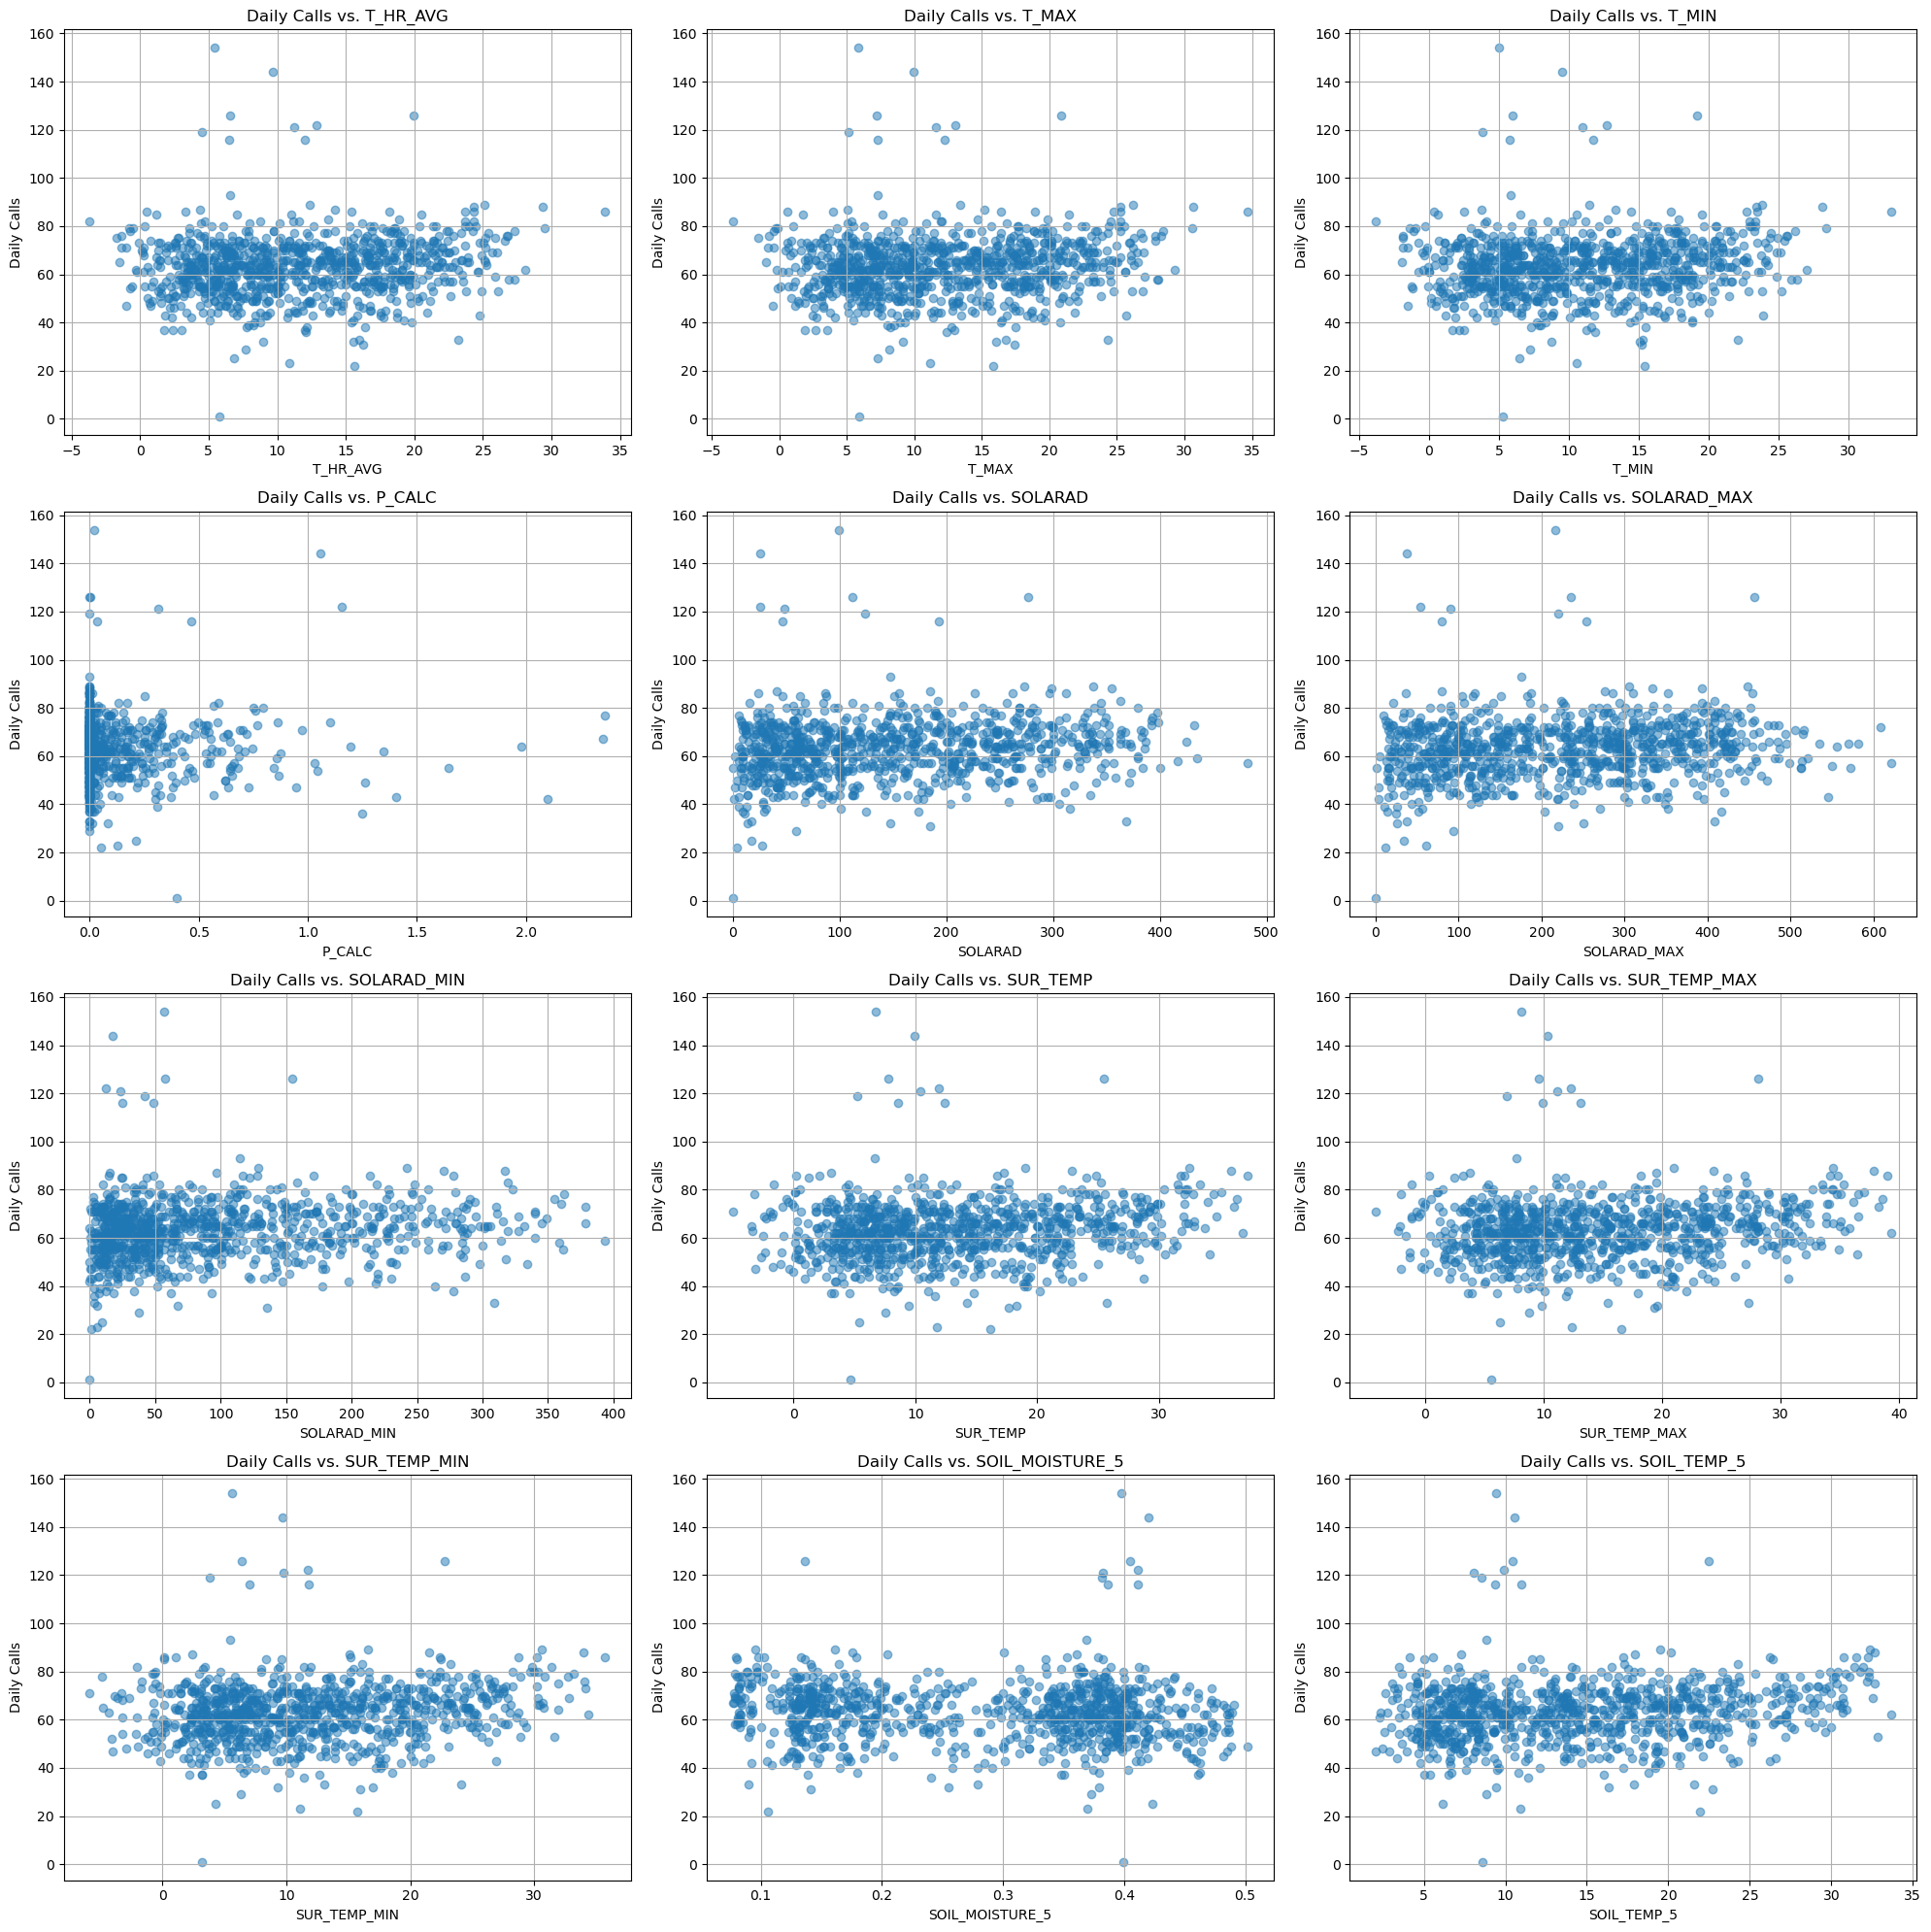

In [15]:
daily_calls = wc.resample('D').size()
daily_calls = daily_calls[daily_calls > 0]
daily_weather = wc.resample('D').mean()
daily_weather = daily_weather.dropna()

common_index = daily_calls.index.intersection(daily_weather.index)
daily_calls = daily_calls.loc[common_index]
daily_weather = daily_weather.loc[common_index]

weather_vars = daily_weather.columns  

fig, axes = plt.subplots(4, 3, figsize=(20, 20))  
axes = axes.flatten()  

for i, column in enumerate(weather_vars):
    combined_data = pd.DataFrame({
        'Daily Calls': daily_calls,
        'Weather Metric': daily_weather[column]
    })

    ax = axes[i]
    ax.scatter(combined_data['Weather Metric'], combined_data['Daily Calls'], alpha=0.5)
    ax.set_title(f'Daily Calls vs. {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Daily Calls')
    ax.grid(True)

plt.tight_layout()
plt.show()

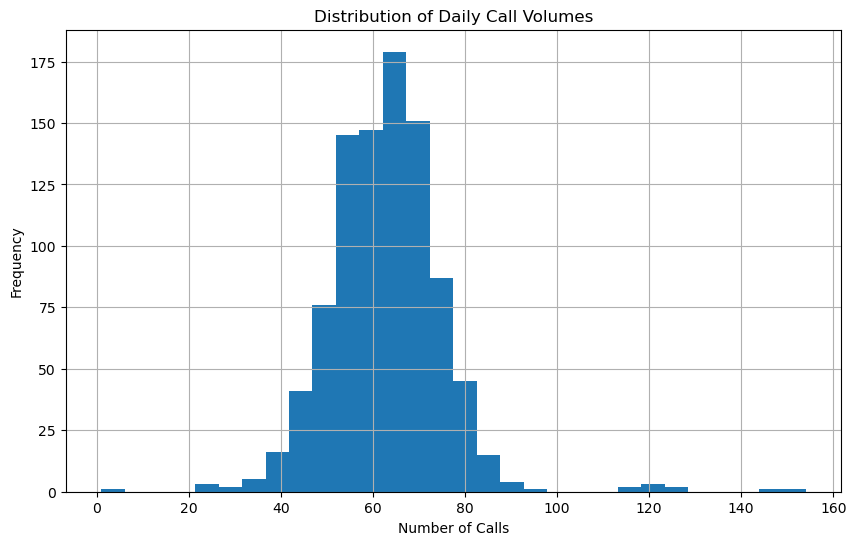

In [16]:

# Histogram of call volumes
plt.figure(figsize=(10, 6))
daily_calls.plot(kind='hist', bins=30)
plt.title('Distribution of Daily Call Volumes')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



**SOME REGRESSION**

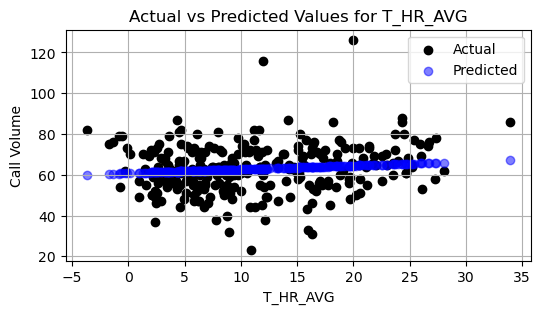

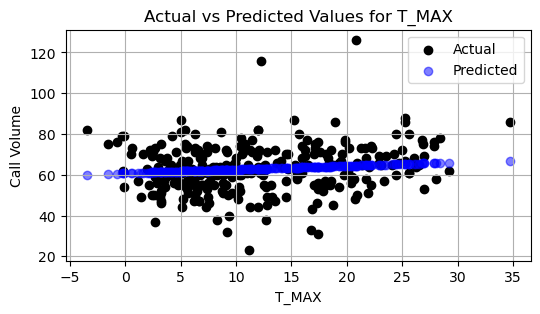

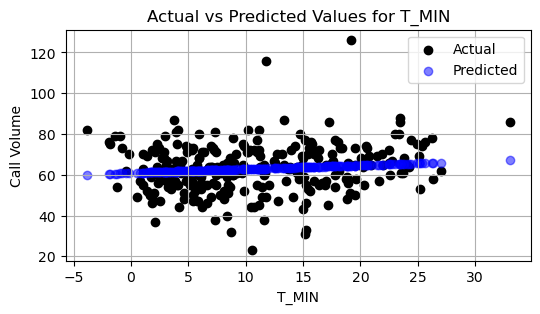

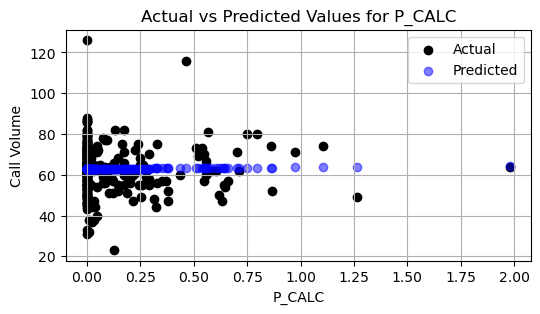

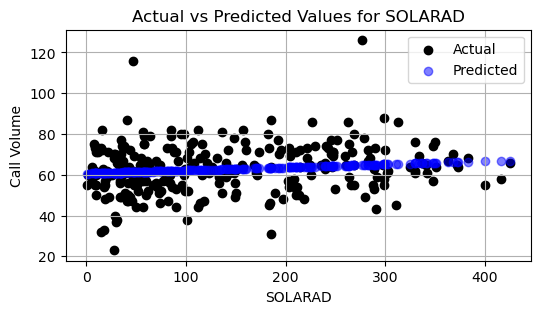

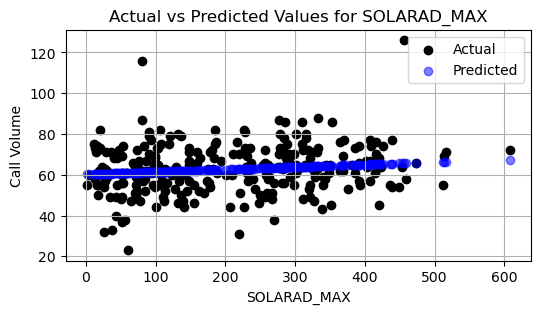

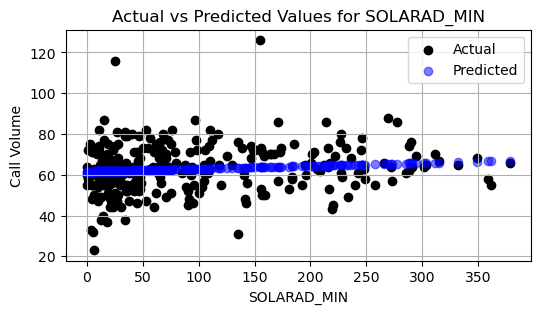

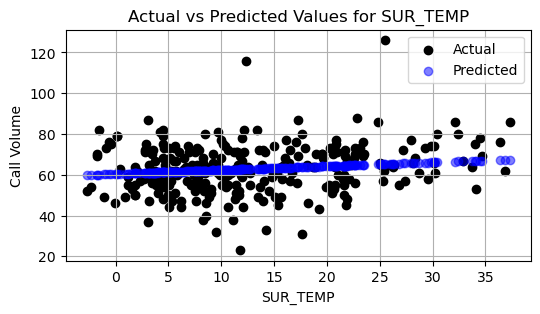

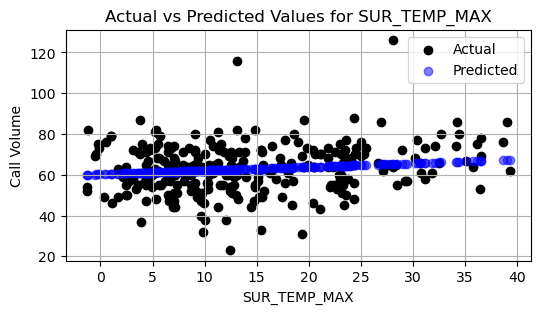

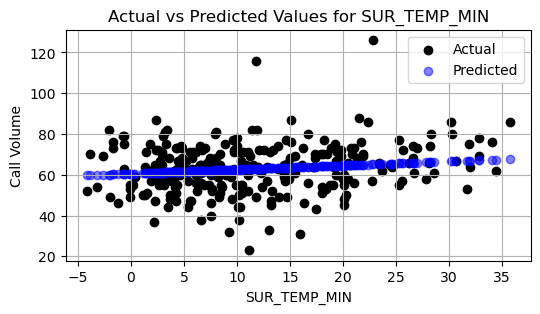

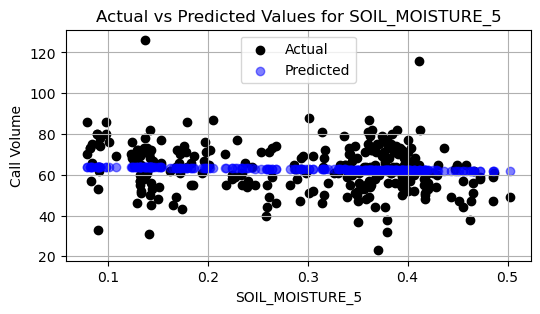

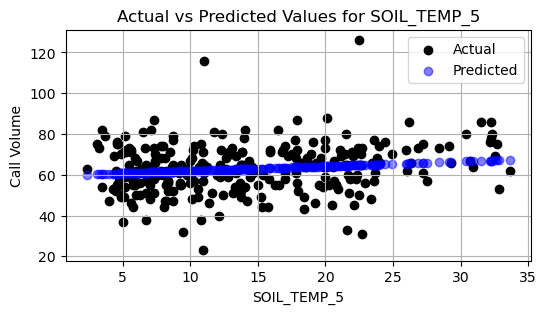

T_HR_AVG: Coef = 0.186, Intercept = 60.768, P-Value = 0.016, MSE = 138.585, R2 = 0.025
T_MAX: Coef = 0.182, Intercept = 60.686, P-Value = 0.016, MSE = 138.539, R2 = 0.025
T_MIN: Coef = 0.189, Intercept = 60.854, P-Value = 0.017, MSE = 138.625, R2 = 0.025
P_CALC: Coef = 0.794, Intercept = 62.835, P-Value = 0.685, MSE = 142.176, R2 = -0.000
SOLARAD: Coef = 0.015, Intercept = 60.588, P-Value = 0.002, MSE = 138.364, R2 = 0.026
SOLARAD_MAX: Coef = 0.012, Intercept = 60.172, P-Value = 0.001, MSE = 138.626, R2 = 0.025
SOLARAD_MIN: Coef = 0.014, Intercept = 61.533, P-Value = 0.016, MSE = 139.122, R2 = 0.021
SUR_TEMP: Coef = 0.191, Intercept = 60.352, P-Value = 0.001, MSE = 137.131, R2 = 0.035
SUR_TEMP_MAX: Coef = 0.180, Intercept = 60.235, P-Value = 0.001, MSE = 137.319, R2 = 0.034
SUR_TEMP_MIN: Coef = 0.202, Intercept = 60.504, P-Value = 0.001, MSE = 137.106, R2 = 0.035
SOIL_MOISTURE_5: Coef = -5.322, Intercept = 64.393, P-Value = 0.199, MSE = 139.980, R2 = 0.015
SOIL_TEMP_5: Coef = 0.229, In

In [17]:
daily_data = pd.DataFrame({
    'Call Volume': daily_calls,
    'T_HR_AVG': daily_weather['T_HR_AVG'],
    'T_MAX': daily_weather['T_MAX'],
    'T_MIN': daily_weather['T_MIN'],
    'P_CALC': daily_weather['P_CALC'],
    'SOLARAD': daily_weather['SOLARAD'],
    'SOLARAD_MAX': daily_weather['SOLARAD_MAX'],
    'SOLARAD_MIN': daily_weather['SOLARAD_MIN'],
    'SUR_TEMP': daily_weather['SUR_TEMP'],
    'SUR_TEMP_MAX': daily_weather['SUR_TEMP_MAX'],
    'SUR_TEMP_MIN': daily_weather['SUR_TEMP_MIN'],
    'SOIL_MOISTURE_5': daily_weather['SOIL_MOISTURE_5'],
    'SOIL_TEMP_5': daily_weather['SOIL_TEMP_5']
}).dropna()

results = []

for column in daily_data.columns[1:]:
    X = daily_data[[column]]
    y = daily_data['Call Volume']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    X_train_sm = sm.add_constant(X_train)
    X_test_sm = sm.add_constant(X_test)

    model = sm.OLS(y_train, X_train_sm).fit()

    y_pred = model.predict(X_test_sm)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Variable': column,
        'Coefficient': model.params[1],  
        'Intercept': model.params[0],  
        'P-Value': model.pvalues[1],  
        'MSE': mse,
        'R2': r2
    })

    plt.figure(figsize=(6, 3))
    plt.scatter(X_test, y_test, color='black', label='Actual')
    plt.scatter(X_test, y_pred, color='blue', alpha=0.5, label='Predicted')
    plt.xlabel(column)
    plt.ylabel('Call Volume')
    plt.title(f'Actual vs Predicted Values for {column}')
    plt.legend()
    plt.grid(True)
    plt.show()



for result in results:
    print(f"{result['Variable']}: Coef = {result['Coefficient']:.3f}, Intercept = {result['Intercept']:.3f}, P-Value = {result['P-Value']:.3f}, MSE = {result['MSE']:.3f}, R2 = {result['R2']:.3f}")


In [21]:
hourly_calls = wc.resample('H').size()
hourly_calls = hourly_calls[hourly_calls > 0]
hourly_weather = wc.resample('H').mean()
hourly_weather = hourly_weather.dropna()

hourly_data = pd.DataFrame({
    'Call Volume': hourly_calls,
    'T_HR_AVG': hourly_weather['T_HR_AVG'],
    'T_MAX': hourly_weather['T_MAX'],
    'T_MIN': hourly_weather['T_MIN'],
    'P_CALC': hourly_weather['P_CALC'],
    'SOLARAD': hourly_weather['SOLARAD'],
    'SOLARAD_MAX': hourly_weather['SOLARAD_MAX'],
    'SOLARAD_MIN': hourly_weather['SOLARAD_MIN'],
    'SUR_TEMP': hourly_weather['SUR_TEMP'],
    'SUR_TEMP_MAX': hourly_weather['SUR_TEMP_MAX'],
    'SUR_TEMP_MIN': hourly_weather['SUR_TEMP_MIN'],
    'SOIL_MOISTURE_5': hourly_weather['SOIL_MOISTURE_5'],
    'SOIL_TEMP_5': hourly_weather['SOIL_TEMP_5']
}).dropna()

results = []

for column in hourly_data.columns[1:]:
    X = hourly_data[[column]]
    y = hourly_data['Call Volume']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    X_train_sm = sm.add_constant(X_train)
    model_sm = sm.OLS(y_train, X_train_sm).fit()

    results.append({
        'Variable': column,
        'Coefficient': model.coef_[0],
        'Intercept': model.intercept_,
        'MSE': mse,
        'R2': r2,
        'P-Value': model_sm.pvalues[1]
    })

for result in results:
    print(f"{result['Variable']}: Coef = {result['Coefficient']:.3f}, Intercept = {result['Intercept']:.3f}, P-Value = {result['P-Value']:.3f}, MSE = {result['MSE']:.3f}, R2 = {result['R2']:.3f}")


T_HR_AVG: Coef = 0.023, Intercept = 2.619, P-Value = 0.000, MSE = 2.711, R2 = 0.016
T_MAX: Coef = 0.023, Intercept = 2.607, P-Value = 0.000, MSE = 2.710, R2 = 0.016
T_MIN: Coef = 0.023, Intercept = 2.629, P-Value = 0.000, MSE = 2.711, R2 = 0.015
P_CALC: Coef = 0.017, Intercept = 2.867, P-Value = 0.568, MSE = 2.755, R2 = -0.000
SOLARAD: Coef = 0.000, Intercept = 2.857, P-Value = 0.179, MSE = 2.755, R2 = -0.001
SOLARAD_MAX: Coef = 0.000, Intercept = 2.861, P-Value = 0.392, MSE = 2.755, R2 = -0.001
SOLARAD_MIN: Coef = 0.000, Intercept = 2.856, P-Value = 0.073, MSE = 2.755, R2 = -0.001
SUR_TEMP: Coef = 0.010, Intercept = 2.742, P-Value = 0.000, MSE = 2.737, R2 = 0.006
SUR_TEMP_MAX: Coef = 0.009, Intercept = 2.740, P-Value = 0.000, MSE = 2.738, R2 = 0.006
SUR_TEMP_MIN: Coef = 0.011, Intercept = 2.748, P-Value = 0.000, MSE = 2.736, R2 = 0.006
SOIL_MOISTURE_5: Coef = -0.264, Intercept = 2.944, P-Value = 0.020, MSE = 2.753, R2 = 0.000
SOIL_TEMP_5: Coef = 0.020, Intercept = 2.586, P-Value = 0.0

/var/folders/rw/srsc7tq57fv7qr3sm2wgwhc00000gn/T/ipykernel_2003/3912327202.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_weather = wc.resample('H').mean()


Model 1 with T_HR_AVG, SOLARAD, SUR_TEMP, and SOIL_TEMP_5
Coefficients: [-9.59126596e-01 -2.54146616e-04  7.35629373e-01  1.97579798e-01]
Intercept: 61.29111758384919
Mean Squared Error: 136.7849307198182
R^2: 0.037589564513022644

Model 1 (Statsmodels) with T_HR_AVG, SOLARAD, SUR_TEMP, and SOIL_TEMP_5
                            OLS Regression Results                            
Dep. Variable:            Call Volume   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     5.246
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           0.000366
Time:                        18:54:52   Log-Likelihood:                -2567.4
No. Observations:                 648   AIC:                             5145.
Df Residuals:                     643   BIC:                             5167.
Df Model:                           4                           

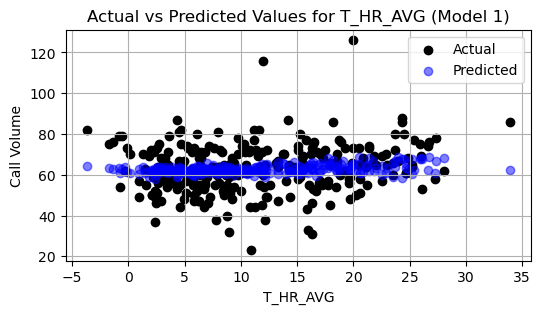

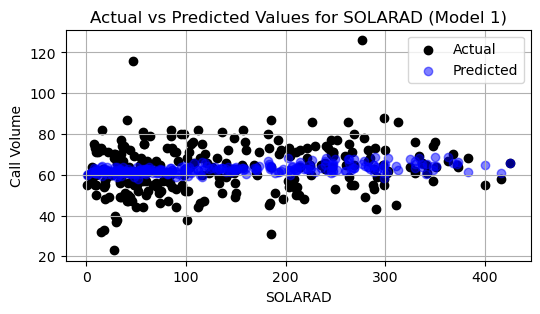

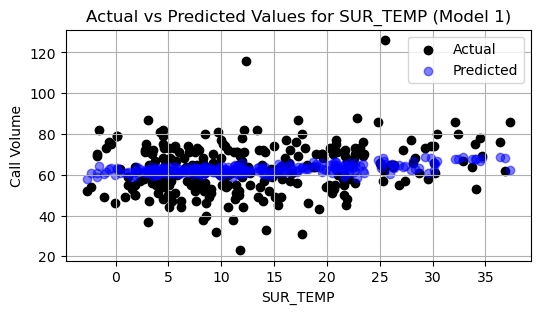

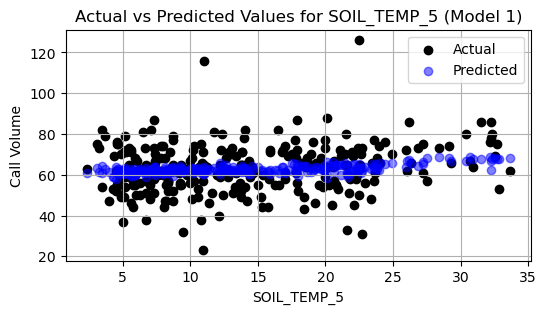


Model 2 with T_HR_AVG, P_CALC, SUR_TEMP, and SOIL_MOISTURE_5
Coefficients: [-0.9523499   2.07086089  1.00670662  8.9428543 ]
Intercept: 57.743705101978385
Mean Squared Error: 136.81425963735805
R^2: 0.037383208036813054

Model 2 (Statsmodels) with T_HR_AVG, P_CALC, SUR_TEMP, and SOIL_MOISTURE_5
                            OLS Regression Results                            
Dep. Variable:            Call Volume   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     6.046
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           8.86e-05
Time:                        18:54:52   Log-Likelihood:                -2565.8
No. Observations:                 648   AIC:                             5142.
Df Residuals:                     643   BIC:                             5164.
Df Model:                           4                                  

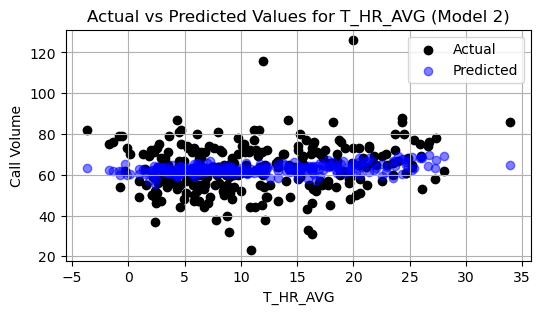

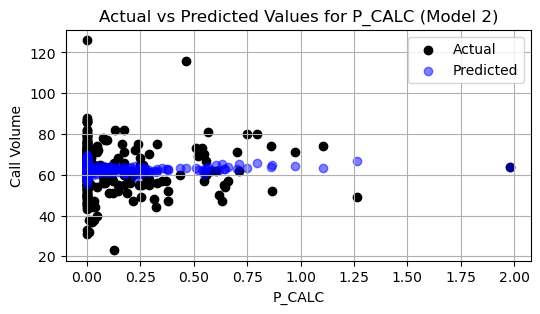

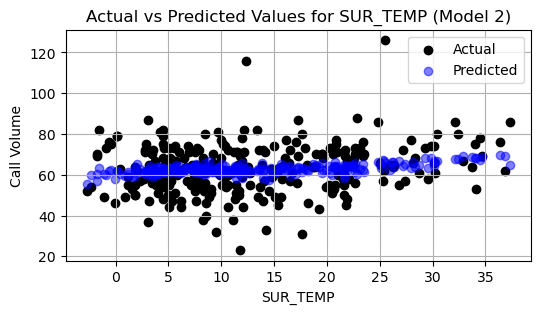

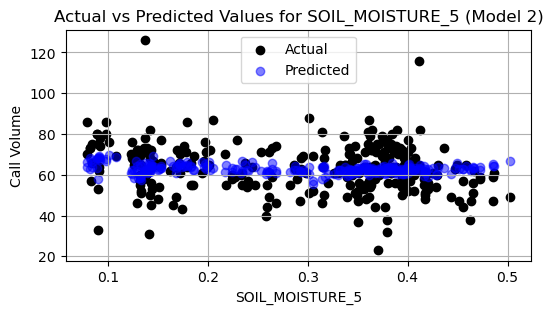

In [19]:
X1 = daily_data[['T_HR_AVG', 'SOLARAD', 'SUR_TEMP', 'SOIL_TEMP_5']]
X2 = daily_data[['T_HR_AVG', 'P_CALC', 'SUR_TEMP', 'SOIL_MOISTURE_5']]
y = daily_data['Call Volume']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y_train)
y_pred1 = model1.predict(X1_test)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print("Model 1 with T_HR_AVG, SOLARAD, SUR_TEMP, and SOIL_TEMP_5")
print("Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)
print("Mean Squared Error:", mse1)
print("R^2:", r2_1)

X1_train_sm = sm.add_constant(X1_train)
X1_test_sm = sm.add_constant(X1_test)
model1_sm = sm.OLS(y_train, X1_train_sm).fit()
print("\nModel 1 (Statsmodels) with T_HR_AVG, SOLARAD, SUR_TEMP, and SOIL_TEMP_5")
print(model1_sm.summary())

for i, column in enumerate(X1.columns):
    plt.figure(figsize=(6, 3))
    plt.scatter(X1_test.iloc[:, i], y_test, color='black', label='Actual')
    plt.scatter(X1_test.iloc[:, i], y_pred1, color='blue', alpha=0.5, label='Predicted')
    plt.xlabel(column)
    plt.ylabel('Call Volume')
    plt.title(f'Actual vs Predicted Values for {column} (Model 1)')
    plt.legend()
    plt.grid(True)
    plt.show()

model2 = LinearRegression()
model2.fit(X2_train, y_train)
y_pred2 = model2.predict(X2_test)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("\nModel 2 with T_HR_AVG, P_CALC, SUR_TEMP, and SOIL_MOISTURE_5")
print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)
print("Mean Squared Error:", mse2)
print("R^2:", r2_2)

X2_train_sm = sm.add_constant(X2_train)
X2_test_sm = sm.add_constant(X2_test)
model2_sm = sm.OLS(y_train, X2_train_sm).fit()
print("\nModel 2 (Statsmodels) with T_HR_AVG, P_CALC, SUR_TEMP, and SOIL_MOISTURE_5")
print(model2_sm.summary())

for i, column in enumerate(X2.columns):
    plt.figure(figsize=(6, 3))
    plt.scatter(X2_test.iloc[:, i], y_test, color='black', label='Actual')
    plt.scatter(X2_test.iloc[:, i], y_pred2, color='blue', alpha=0.5, label='Predicted')
    plt.xlabel(column)
    plt.ylabel('Call Volume')
    plt.title(f'Actual vs Predicted Values for {column} (Model 2)')
    plt.legend()
    plt.grid(True)
    plt.show()
